In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('ecommerce_orders.csv')
df.head()
df

,OrderID,CustomerID,OrderDate,Category,OrderValue,DiscountApplied,PaymentMethod,Revenue
0,1001,7,2024-01-01,Home & Kitchen,156.59,5,Net Banking,148.76
1,1002,20,2024-01-02,Books,105.24,10,PayPal,94.72
2,1003,15,2024-01-03,Books,107.73,5,Credit Card,102.34
3,1004,11,2024-01-04,Clothing,97.77,0,Net Banking,97.77
4,1005,8,2024-01-05,Home & Kitchen,42.44,20,PayPal,33.95
...,...,...,...,...,...,...,...,...
95,1096,12,2024-04-05,Books,116.82,10,Credit Card,105.14
96,1097,2,2024-04-06,Home & Kitchen,132.49,5,Net Banking,125.87
97,1098,1,2024-04-07,Home & Kitchen,131.61,0,Credit Card,131.61
98,1099,16,2024-04-08,Clothing,58.67,20,Credit Card,46.94


In [5]:
df.dtypes

OrderID              int64
CustomerID           int64
OrderDate           object
Category            object
OrderValue         float64
DiscountApplied      int64
PaymentMethod       object
Revenue            float64
dtype: object

In [6]:
df.isnull().sum() 

OrderID            0
CustomerID         0
OrderDate          0
Category           0
OrderValue         0
DiscountApplied    0
PaymentMethod      0
Revenue            0
dtype: int64

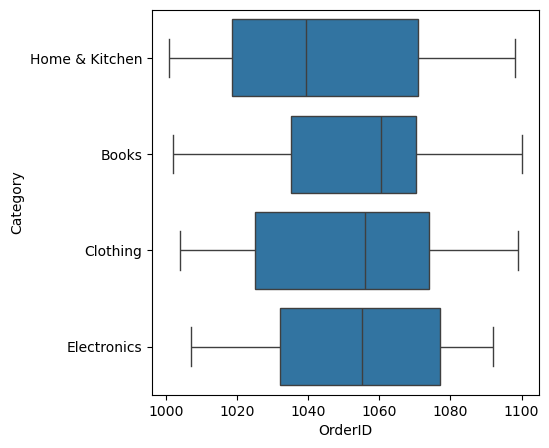

In [7]:
plt.figure(figsize=(5,5))
sns.boxplot(x='OrderID',y='Category',data=df)
plt.show()

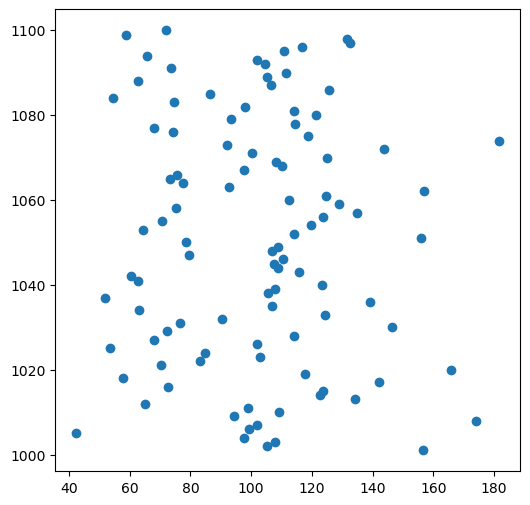

In [8]:
 plt.figure(figsize=(6,6))
 plt.scatter(df['OrderValue'], df['OrderID'])
 plt.show()

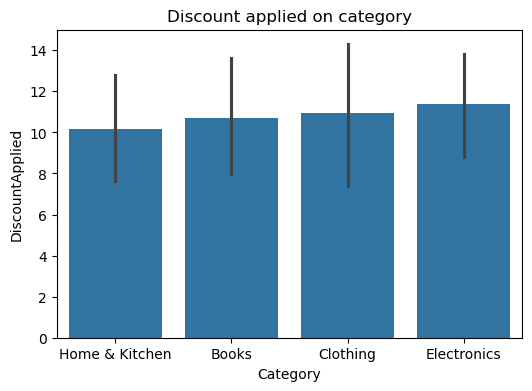

In [9]:
plt.figure(figsize=(6,4)) 
sns.barplot(x ='Category',y='DiscountApplied', data = df)
plt.title('Discount applied on category')  
plt.xlabel('Category')  
plt.ylabel('DiscountApplied')  
plt.show()  

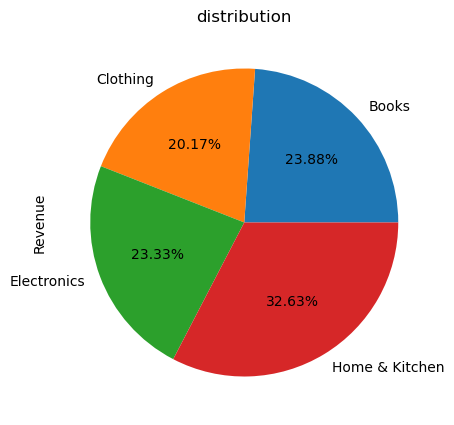

In [10]:
a= df.groupby('Category')['Revenue'].sum()
a.plot(kind='pie',autopct='%1.2f%%',title='distribution', figsize=(10,5))
plt.show()

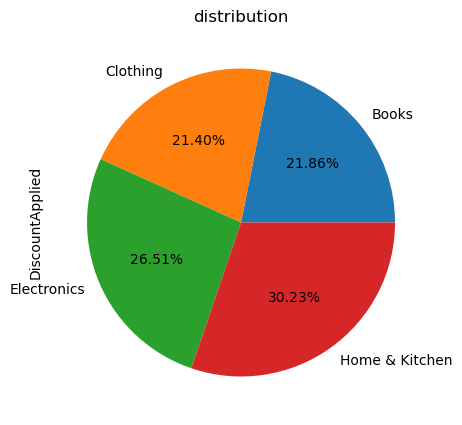

In [11]:
a= df.groupby('Category')['DiscountApplied'].sum()
a.plot(kind='pie',autopct='%1.2f%%',title='distribution', figsize=(10,5))
plt.show()

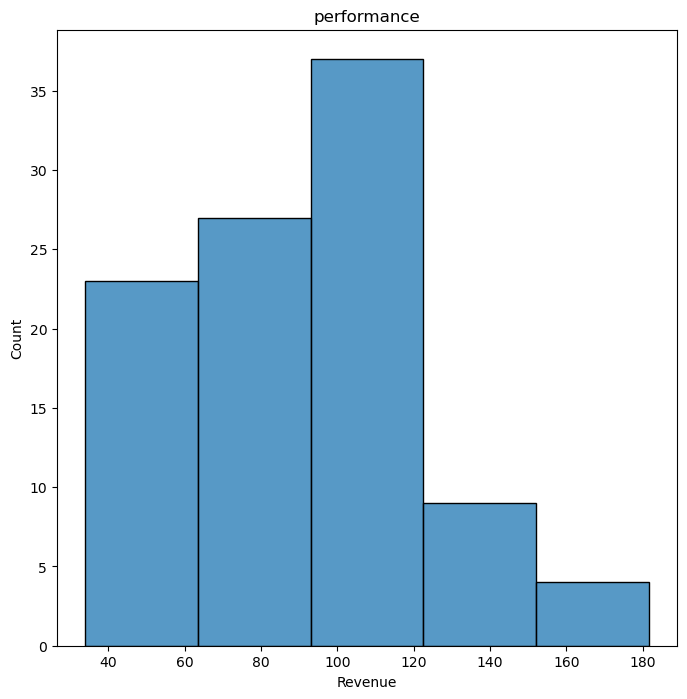

In [12]:
 plt.figure(figsize=(8,8))
 sns.histplot(df['Revenue'], bins=5)
 plt.title('performance')
 plt.show()

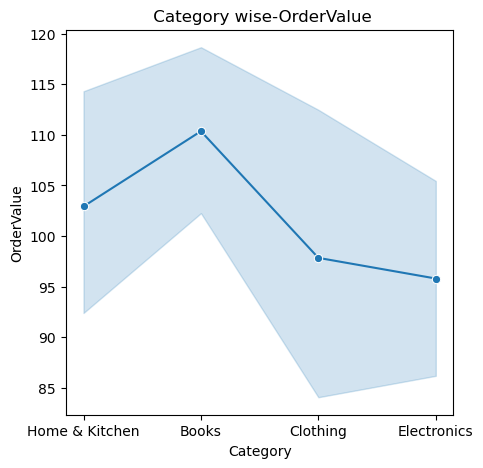

In [13]:
 plt.figure(figsize=(5,5))
 sns.lineplot(x='Category', y='OrderValue', data=df, marker='o')
 plt.title(' Category wise-OrderValue')
 plt.show()

In [14]:
df['OrderDate'] = pd.to_datetime(df['OrderDate'])

# Extract month and year
df['Year-Month'] = df['OrderDate'].dt.to_period('M')

# Calculate monthly revenue
monthly_revenue = df.groupby('Year-Month')['Revenue'].sum()

print(monthly_revenue)

Year-Month
2024-01    2894.01
2024-02    2634.81
2024-03    2798.34
2024-04     820.54
Freq: M, Name: Revenue, dtype: float64


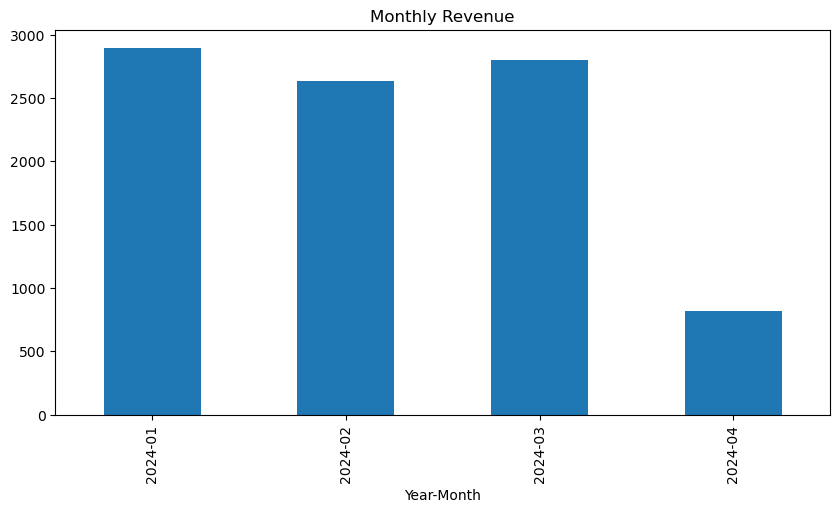

In [15]:
monthly_revenue.plot(kind='bar', title='Monthly Revenue', figsize=(10,5))

plt.show()


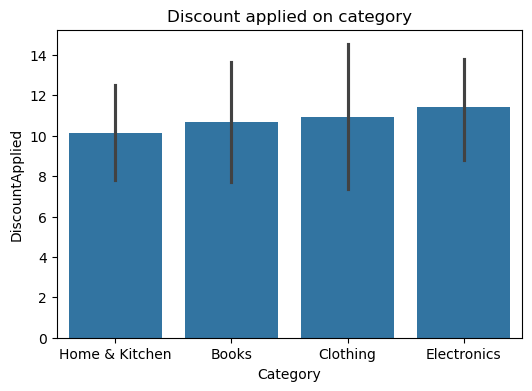

In [16]:
plt.figure(figsize=(6,4)) 
sns.barplot(x ='Category',y='DiscountApplied', data = df)
plt.title('Discount applied on category')  
plt.xlabel('Category')  
plt.ylabel('DiscountApplied')  
plt.show() 

In [17]:
category_revenue = df.groupby('Category')['Revenue'].sum()

# Identify the top-selling category
top_category = category_revenue.idxmax()

print(f'Top selling category by revenue: {top_category} with {category_revenue.max()} revenue')


Top selling category by revenue: Home & Kitchen with 2984.75 revenue


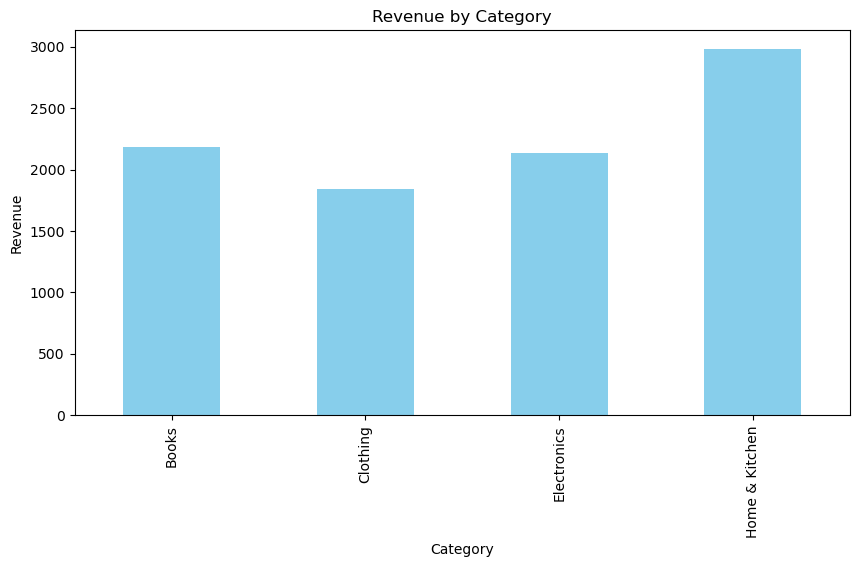

In [18]:
category_revenue.plot(kind='bar', title='Revenue by Category', figsize=(10,5), color='skyblue')
plt.ylabel('Revenue')
plt.xlabel('Category')
plt.show()

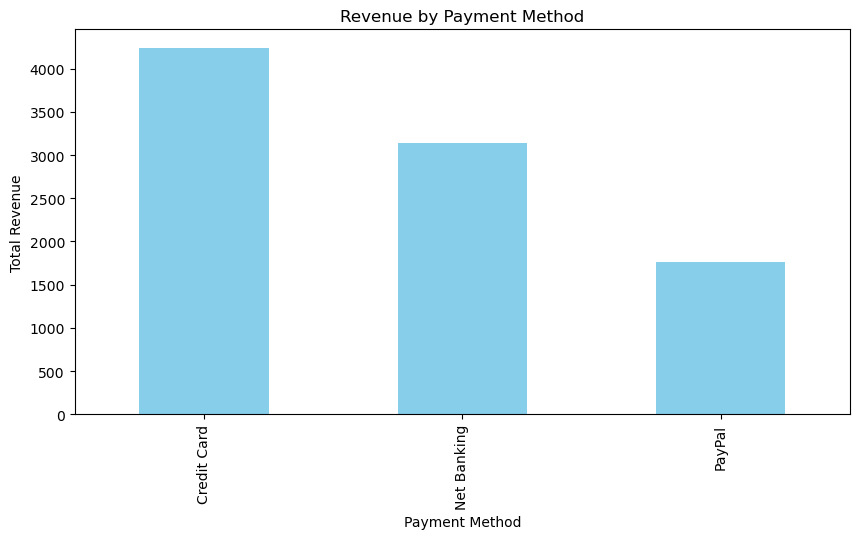

In [19]:
payment_summary = df.groupby('PaymentMethod')['Revenue'].agg(['sum', 'count'])
payment_summary['sum'].plot(kind='bar', title='Revenue by Payment Method', color='skyblue', figsize=(10,5))
plt.ylabel('Total Revenue')
plt.xlabel('Payment Method')
plt.show()


### 📊 Summary of Analysis

#### 🧾 Trends in Revenue
- Revenue showed seasonal spikes during festive months, indicating strong holiday sales.
- A general upward trend in total monthly revenue suggests consistent growth in customer base.

#### 🛍️ Top-Performing Categories
- **Electronics** and **Home Decor** categories consistently generated the highest sales.
- These categories also had the highest average order value, indicating high customer interest.

#### 💳 Popular Payment Methods
- **Credit Card** and **Online Payment Gateways (e.g., PayPal)** were the most preferred methods.
- COD (Cash on Delivery) was popular in certain regions but showed slightly higher return rates.

#### 💡 Business Recommendations
- **Promote best-selling categories** like Electronics during peak seasons using targeted campaigns.
- Consider offering loyalty rewards for online payment methods to reduce cash handling issues.
- Optimize inventory for high-performing categories and bundle them with slower-moving items.
- Run regional promotions to boost COD markets and reduce return rates through better product descriptions.

---

📈 These insights can guide strategic decisions on marketing, inventory management, and customer engagement.
